# RESULTS VISUALIZATION CODE

# BRATS segmentation visualization

c:\Users\Station5\miniconda3\envs\dplearning\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.7896989983333333


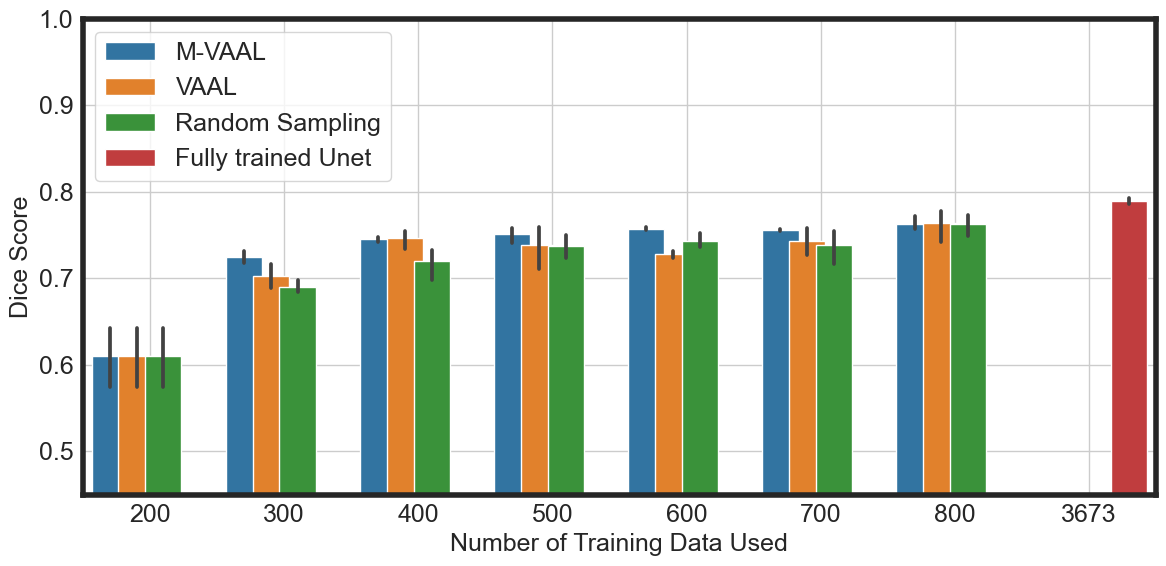

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/Utsav_budget100_WGAN_GP_new.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning brats Utsav HGG budget100 WGANGP"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - test Dice__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)



data = data[['multimodal_VAALFalse0.2', 'VAALFalse1','RandomSamplingFalse1','RandomSamplingTrue1']]
data.rename(columns={'multimodal_VAALFalse0.2': 'M-VAAL', 'VAALFalse1': 'VAAL','RandomSamplingFalse1': 'Random Sampling','RandomSamplingTrue1': 'Fully trained Unet'}, inplace=True)

samples = [(100*i+200) for i in range(0,7,1)]
samples = [ '%.0f' % elem for elem in samples ]
samples.append(3673)

print (np.mean(np.mean(data['Fully trained Unet'])))

data['Number of Training Data Used'] = samples
data = data.melt('Number of Training Data Used', var_name='cols', value_name='Dice Score')
fig = plt.figure(figsize=(12,6))




ax1 = plt.subplot(111)
sns.barplot(ax = ax1, x="Number of Training Data Used", y ="Dice Score", hue='cols', data=data)
plt.legend(loc= 'upper left')
plt.grid(linestyle='-', linewidth=1)
plt.ylim((0.45,1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .27)
ax1.spines["bottom"].set_linewidth(4)
ax1.spines["top"].set_linewidth(4)
ax1.spines["left"].set_linewidth(4)
ax1.spines["right"].set_linewidth(4)
ax1.grid(linestyle='-', linewidth=1)
plt.tight_layout()

# BRATS multi-label Classification

c:\Users\Station5\miniconda3\envs\dplearning\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.9656396776666666


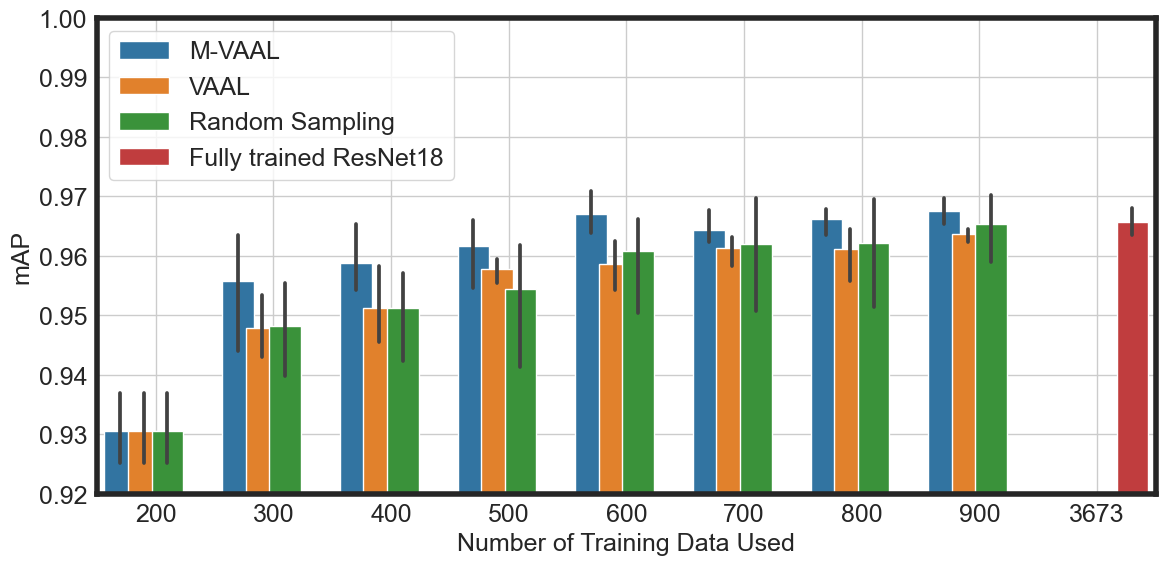

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/Utsav_budget100_WGAN_GP_classification_new.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning brats Utsav HGG budget100 WGANGP classification new train"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - test mAP__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)

#print (data)
data = data[['multimodal_VAALFalse1', 'VAALFalse1','RandomSamplingFalse1','full_train_seed0','full_train_seed100','full_train_seed500']]
data = data.rename(columns=lambda x: 'full_train' if 'full_train' in x else x)
# data = data.rename(columns=lambda x: 'RandomSamplingFalse1' if 'random_sampling' in x else x)
data.rename(columns={'multimodal_VAALFalse1': 'M-VAAL', 'VAALFalse1': 'VAAL','RandomSamplingFalse1': 'Random Sampling','full_train': 'Fully trained ResNet18'}, inplace=True)

samples = [(100*i+200) for i in range(0,8,1)]
samples = [ '%.0f' % elem for elem in samples ]
samples.append(3673)
print (np.mean(np.mean(data['Fully trained ResNet18'])))


data['Number of Training Data Used'] = samples
data = data.melt('Number of Training Data Used', var_name='cols', value_name='mAP')
#append_data = pd.DataFrame({'Percentage  of Training Data Used':[100,100,100],'cols': "Fully trained-Unet",'Mean Dice Score': full_train})
#data = data.append(append_data, ignore_index = True)
fig = plt.figure(figsize=(12,6))




ax1 = plt.subplot(111)
sns.barplot(ax = ax1, x="Number of Training Data Used", y ="mAP", hue='cols', data=data)
plt.legend(loc= 'upper left')
plt.grid(linestyle='-', linewidth=1)
plt.ylim((0.92,1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .27)
ax1.spines["bottom"].set_linewidth(4)
ax1.spines["top"].set_linewidth(4)
ax1.spines["left"].set_linewidth(4)
ax1.spines["right"].set_linewidth(4)
ax1.grid(linestyle='-', linewidth=1)
plt.tight_layout()




# COVID multi-class classification

c:\Users\Station5\miniconda3\envs\dplearning\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.951114923


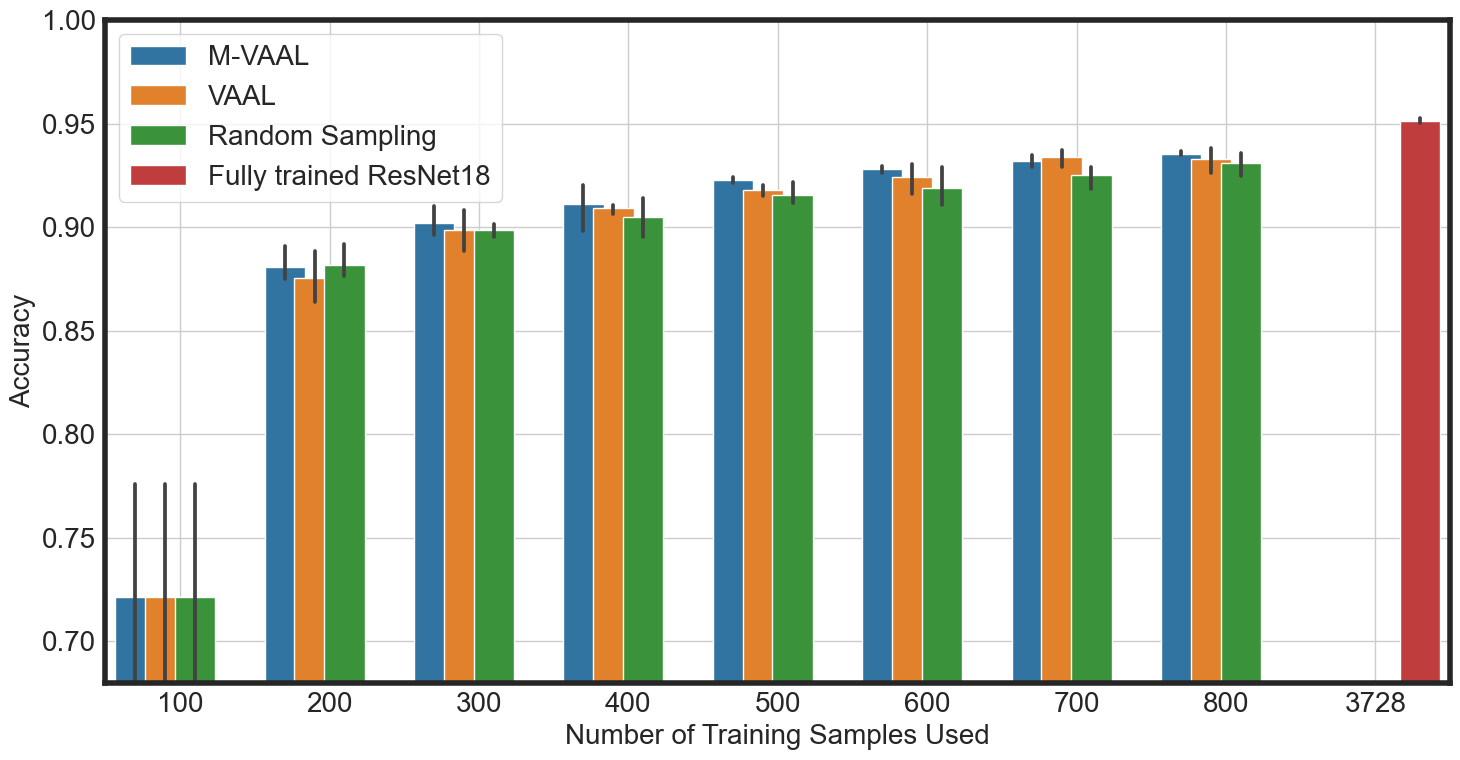

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 20})


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/COVID_budget100_test_acc.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning COVID budget100"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - Test Accuracy__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)

data = data[['multimodal_VAALFalse1', 'VAALFalse1','RandomSamplingFalse1','full_train_seed0','full_train_seed100','full_train_seed500']]
data = data.rename(columns=lambda x: 'full_train' if 'full_train' in x else x)
data.rename(columns={'multimodal_VAALFalse1': 'M-VAAL', 'VAALFalse1': 'VAAL','RandomSamplingFalse1': 'Random Sampling','full_train': 'Fully trained ResNet18'}, inplace=True)


samples = [(100*i+100) for i in range(0,8,1)]
samples = [ '%.0f' % elem for elem in samples ]
samples.append(3728)

print (np.mean(np.mean(data['Fully trained ResNet18'])))

data['Number of Training Samples Used'] = samples
data = data.melt('Number of Training Samples Used', var_name='cols', value_name='Accuracy')
fig = plt.figure(figsize=(15,8))



ax1 = plt.subplot(111)
sns.barplot(ax = ax1, x="Number of Training Samples Used", y ="Accuracy", hue='cols', data=data)
plt.legend(loc= 'upper left')
plt.grid(linestyle='-', linewidth=1)
plt.ylim((0.68,1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .27)
ax1.spines["bottom"].set_linewidth(4)
ax1.spines["top"].set_linewidth(4)
ax1.spines["left"].set_linewidth(4)
ax1.spines["right"].set_linewidth(4)
ax1.grid(linestyle='-', linewidth=1)
plt.tight_layout()

# Ablation Study Compare M-VAAL

# BraTS Segmentation

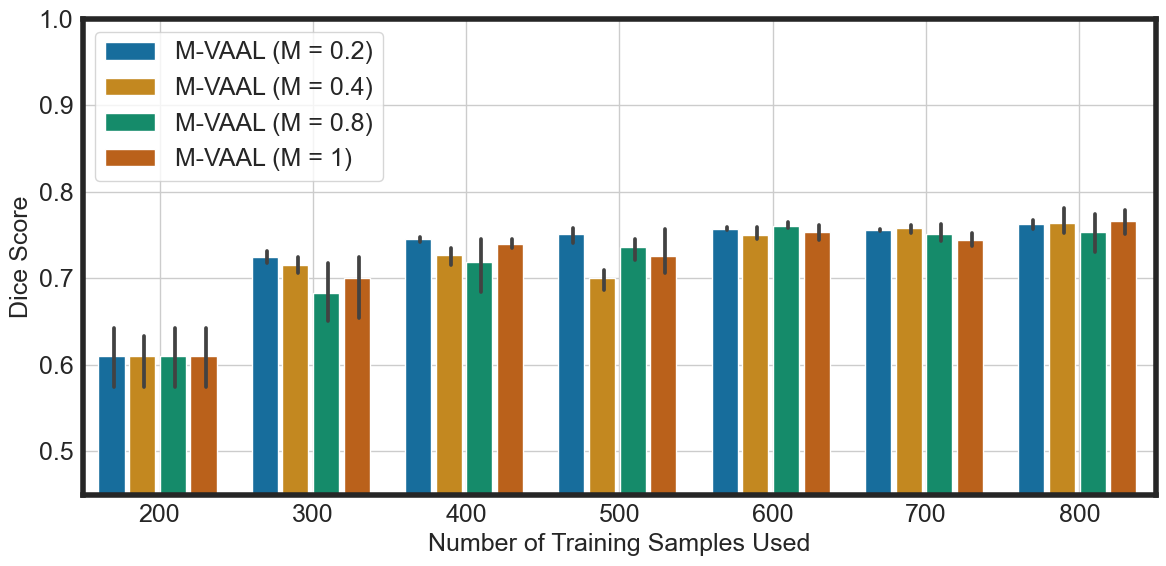

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/Utsav_budget100_WGAN_GP_new.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning brats Utsav HGG budget100 WGANGP"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - test Dice__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)

#print (data)

data = data[['multimodal_VAALFalse0.2', 'multimodal_VAALFalse0.4','multimodal_VAALFalse0.8','multimodal_VAALFalse1']]
data.rename(columns={'multimodal_VAALFalse0.2': 'M-VAAL (M = 0.2)', 'multimodal_VAALFalse0.4': 'M-VAAL (M = 0.4)',
'multimodal_VAALFalse0.8': 'M-VAAL (M = 0.8)','multimodal_VAALFalse1': 'M-VAAL (M = 1)'}, inplace=True)


samples = [(100*i+200) for i in range(0,8,1)]
samples = [ '%.0f' % elem for elem in samples ]
#samples.append(3673.)

data['Number of Training Samples Used'] = samples
data = data.melt('Number of Training Samples Used', var_name='cols', value_name='Dice Score')
#append_data = pd.DataFrame({'Percentage  of Training Data Used':[100,100,100],'cols': "Fully trained-Unet",'Mean Dice Score': full_train})
#data = data.append(append_data, ignore_index = True)
fig = plt.figure(figsize=(12,6))




ax1 = plt.subplot(111)
sns.barplot(ax = ax1, x="Number of Training Samples Used", y ="Dice Score", hue='cols', data=data, palette = "colorblind")
plt.legend(loc= 'upper left')
plt.xlim((-0.5,6.5))
plt.grid(linestyle='-', linewidth=1)
plt.ylim((0.45,1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .05)

change_width(ax1, .17)
ax1.spines["bottom"].set_linewidth(4)
ax1.spines["top"].set_linewidth(4)
ax1.spines["left"].set_linewidth(4)
ax1.spines["right"].set_linewidth(4)
ax1.grid(linestyle='-', linewidth=1)
plt.tight_layout()

# BRATS Classificaiton

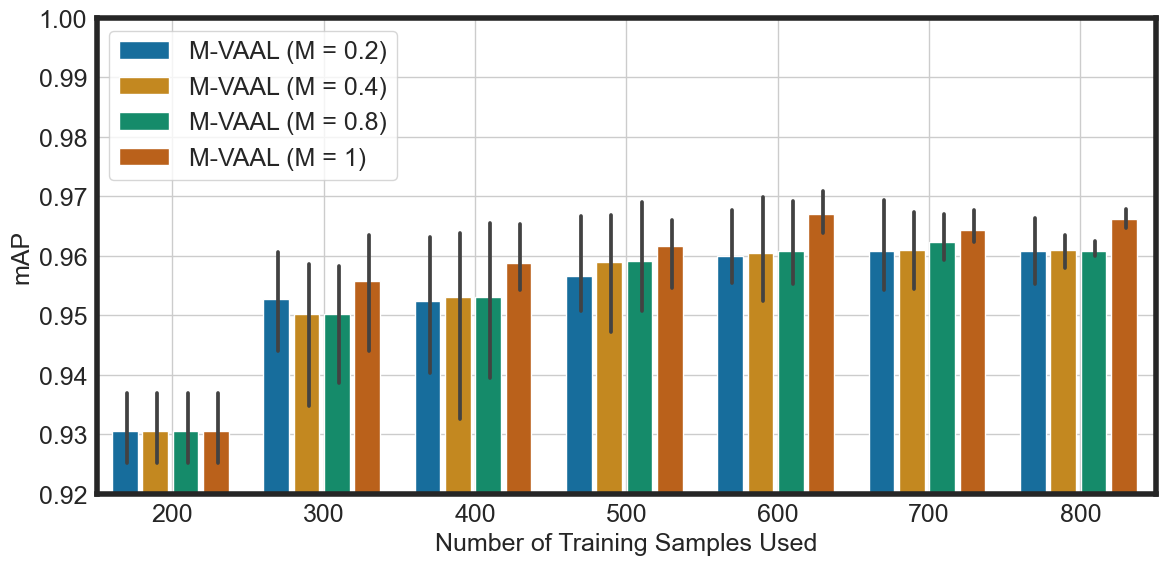

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/Utsav_budget100_WGAN_GP_classification_new.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning brats Utsav HGG budget100 WGANGP classification new train"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - test mAP__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)

#print (data)

data = data[['multimodal_VAALFalse0.2', 'multimodal_VAALFalse0.4','multimodal_VAALFalse0.8','multimodal_VAALFalse1']]
data.rename(columns={'multimodal_VAALFalse0.2': 'M-VAAL (M = 0.2)', 'multimodal_VAALFalse0.4': 'M-VAAL (M = 0.4)',
'multimodal_VAALFalse0.8': 'M-VAAL (M = 0.8)','multimodal_VAALFalse1': 'M-VAAL (M = 1)'}, inplace=True)


samples = [(100*i+200) for i in range(0,9,1)]
samples = [ '%.0f' % elem for elem in samples ]
#samples.append(3673.)

data['Number of Training Samples Used'] = samples
data = data.melt('Number of Training Samples Used', var_name='cols', value_name='mAP')
#append_data = pd.DataFrame({'Percentage  of Training Data Used':[100,100,100],'cols': "Fully trained-Unet",'Mean Dice Score': full_train})
#data = data.append(append_data, ignore_index = True)
fig = plt.figure(figsize=(12,6))




ax1 = plt.subplot(111)
sns.barplot(ax = ax1, x="Number of Training Samples Used", y ="mAP", hue='cols', data=data, palette = "colorblind")
plt.legend(loc= 'upper left')
plt.xlim((-0.5,6.5))
plt.grid(linestyle='-', linewidth=1)
plt.ylim((0.92,1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .05)

change_width(ax1, .17)
ax1.spines["bottom"].set_linewidth(4)
ax1.spines["top"].set_linewidth(4)
ax1.spines["left"].set_linewidth(4)
ax1.spines["right"].set_linewidth(4)
ax1.grid(linestyle='-', linewidth=1)
plt.tight_layout()

# COVID multi-class classification

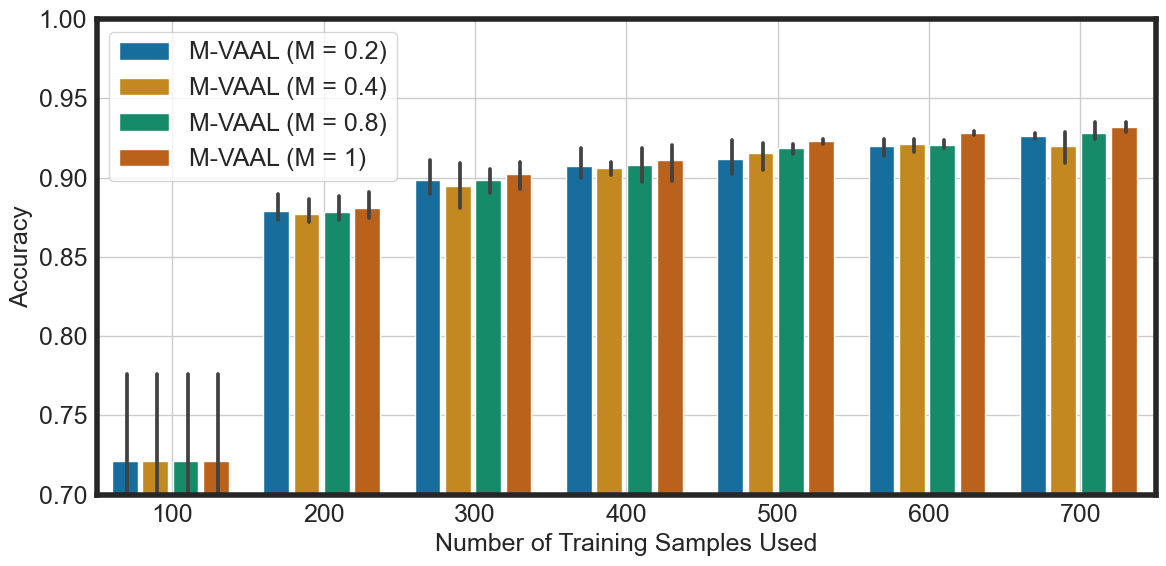

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/COVID_budget100_test_acc.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning COVID budget100"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - Test Accuracy__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)

#print (data)

data = data[['multimodal_VAALFalse0.2', 'multimodal_VAALFalse0.4','multimodal_VAALFalse0.8','multimodal_VAALFalse1']]
data.rename(columns={'multimodal_VAALFalse0.2': 'M-VAAL (M = 0.2)', 'multimodal_VAALFalse0.4': 'M-VAAL (M = 0.4)',
'multimodal_VAALFalse0.8': 'M-VAAL (M = 0.8)','multimodal_VAALFalse1': 'M-VAAL (M = 1)'}, inplace=True)


samples = [(100*i+100) for i in range(0,9,1)]
samples = [ '%.0f' % elem for elem in samples ]
#samples.append(3728.)

data['Number of Training Samples Used'] = samples
data = data.melt('Number of Training Samples Used', var_name='cols', value_name='Accuracy')
#append_data = pd.DataFrame({'Percentage  of Training Data Used':[100,100,100],'cols': "Fully trained-Unet",'Mean Dice Score': full_train})
#data = data.append(append_data, ignore_index = True)
fig = plt.figure(figsize=(12,6))




ax1 = plt.subplot(111)
sns.barplot(ax = ax1, x="Number of Training Samples Used", y ="Accuracy", hue='cols', data=data, palette = "colorblind")
plt.legend(loc= 'upper left')
plt.xlim((-0.5,6.5))
plt.grid(linestyle='-', linewidth=1)
plt.ylim((0.7,1))

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .05)

change_width(ax1, .17)
ax1.spines["bottom"].set_linewidth(4)
ax1.spines["top"].set_linewidth(4)
ax1.spines["left"].set_linewidth(4)
ax1.spines["right"].set_linewidth(4)
ax1.grid(linestyle='-', linewidth=1)
plt.tight_layout()

# BRATS Classification

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})
import warnings 
warnings.filterwarnings("ignore")


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/Utsav_budget100_WGAN_GP_classification_new.csv")
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning brats Utsav HGG budget100 WGANGP classification new train"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    name = run.name+' - test mAP__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)


data = data[['multimodal_VAALFalse1', 'VAALFalse1','RandomSamplingFalse1','full_train_seed0','full_train_seed100','full_train_seed500']]
data = data.rename(columns=lambda x: 'full_train' if 'full_train' in x else x)
# data = data.rename(columns=lambda x: 'RandomSamplingFalse1' if 'random_sampling' in x else x)
data.rename(columns={'multimodal_VAALFalse1': 'M-VAAL', 'VAALFalse1': 'VAAL','RandomSamplingFalse1': 'Random Sampling','full_train': 'Fully trained ResNet18'}, inplace=True)



########### run the statistical test ###########
random = data["Random Sampling"]
MVAAL = data["M-VAAL"]
VAAL = data["VAAL"]

random_list = random.values.tolist()
MVAAL_list = MVAAL.values.tolist()
VAAL_list = VAAL.values.tolist()

df = pd.DataFrame(columns = ["AL budget","M-VAAL", "VAAL", "Rand", "p-value1", "p-value2"])

from scipy import stats
AL_rounds = 200
for rand, mvaal, vaal in zip(random_list,MVAAL_list,VAAL_list):
    _,ran = stats.ttest_ind(rand,mvaal,alternative='two-sided', equal_var = True)
    _,val = stats.ttest_ind(vaal,mvaal,alternative='two-sided', equal_var = True)
    ran = round (ran,2)
    val = round(val,2)
    mvaal_mean = round(np.mean(mvaal),3)
    mvaal_std = round (np.std(mvaal),3)
    vaal_mean = round (np.mean(vaal),3)
    vaal_std = round (np.std(vaal),3)
    rand_mean = round (np.mean(rand),3)
    rand_std = round (np.std(rand),3)

    


    df = df.append({"AL budget": "$" + str(AL_rounds) +"$","M-VAAL": "$"+str(mvaal_mean)+"\pm"+str(mvaal_std)+"$", \
        "VAAL":"$"+str(vaal_mean)+"\pm"+str(vaal_std)+"$", "Rand": "$"+str(rand_mean)+"\pm"+str(rand_std)+"$", \
            "p-value1": "$"+str(val)+"$", "p-value2": "$"+str(ran)+"$"}, ignore_index=True)
    AL_rounds +=100

########## run the statistical test ###########



In [19]:
df = df.reset_index(drop=True)
df.head(10)

,AL budget,M-VAAL,VAAL,Rand,p-value1,p-value2
0,$200$,$0.931\pm0.005$,$0.931\pm0.005$,$0.931\pm0.005$,$1.0$,$1.0$
1,$300$,$0.956\pm0.008$,$0.948\pm0.004$,$0.948\pm0.006$,$0.3$,$0.38$
2,$400$,$0.959\pm0.005$,$0.951\pm0.007$,$0.951\pm0.006$,$0.27$,$0.25$
3,$500$,$0.962\pm0.005$,$0.958\pm0.002$,$0.954\pm0.009$,$0.37$,$0.39$
4,$600$,$0.967\pm0.003$,$0.959\pm0.003$,$0.961\pm0.007$,$0.06$,$0.34$
5,$700$,$0.964\pm0.002$,$0.961\pm0.002$,$0.962\pm0.008$,$0.25$,$0.72$
6,$800$,$0.966\pm0.002$,$0.961\pm0.004$,$0.962\pm0.008$,$0.17$,$0.51$
7,$900$,$0.968\pm0.002$,$0.964\pm0.001$,$0.965\pm0.005$,$0.05$,$0.55$
8,$1000$,$nan\pmnan$,$nan\pmnan$,$nan\pmnan$,$nan$,$nan$


# BraTS segmentation

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 18})
import warnings 
warnings.filterwarnings("ignore")


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/Utsav_budget100_WGAN_GP_new.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning brats Utsav HGG budget100 WGANGP"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - test Dice__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)



data = data[['multimodal_VAALFalse0.2', 'VAALFalse1','RandomSamplingFalse1','RandomSamplingTrue1']]
data.rename(columns={'multimodal_VAALFalse0.2': 'M-VAAL', 'VAALFalse1': 'VAAL','RandomSamplingFalse1': 'Random Sampling','RandomSamplingTrue1': 'Fully trained Unet'}, inplace=True)

########### run the statistical test ###########
random = data["Random Sampling"]
MVAAL = data["M-VAAL"]
VAAL = data["VAAL"]

random_list = random.values.tolist()
MVAAL_list = MVAAL.values.tolist()
VAAL_list = VAAL.values.tolist()

df = pd.DataFrame(columns = ["AL budget","M-VAAL", "VAAL", "Rand", "p-value1", "p-value2"])

from scipy import stats
AL_rounds = 200
for rand, mvaal, vaal in zip(random_list,MVAAL_list,VAAL_list):
    _,ran = stats.ttest_ind(rand,mvaal,alternative='two-sided', equal_var = True)
    _,val = stats.ttest_ind(vaal,mvaal,alternative='two-sided', equal_var = True)
    ran = round (ran,3)
    val = round(val,3)
    mvaal_mean = round(np.mean(mvaal),3)
    mvaal_std = round (np.std(mvaal),3)
    vaal_mean = round (np.mean(vaal),3)
    vaal_std = round (np.std(vaal),3)
    rand_mean = round (np.mean(rand),3)
    rand_std = round (np.std(rand),3)

    df = df.append({"AL budget": "$" + str(AL_rounds) +"$","M-VAAL": "$"+str(mvaal_mean)+"\pm"+str(mvaal_std)+"$", \
        "VAAL":"$"+str(vaal_mean)+"\pm"+str(vaal_std)+"$", "Rand": "$"+str(rand_mean)+"\pm"+str(rand_std)+"$", \
            "p-value1": "$"+str(val)+"$", "p-value2": "$"+str(ran)+"$"}, ignore_index=True)
    # print (" MVAAL - Random, p-value: ", ran)
    # print ("MVAAL - VAAL, p-value: ", val)
    AL_rounds +=100

In [21]:
df = df.reset_index(drop=True)
df.head(10)

,AL budget,M-VAAL,VAAL,Rand,p-value1,p-value2
0,$200$,$0.611\pm0.028$,$0.611\pm0.028$,$0.611\pm0.028$,$1.0$,$1.0$
1,$300$,$0.725\pm0.006$,$0.702\pm0.011$,$0.69\pm0.006$,$0.067$,$0.004$
2,$400$,$0.745\pm0.002$,$0.747\pm0.009$,$0.72\pm0.016$,$0.765$,$0.092$
3,$500$,$0.751\pm0.007$,$0.739\pm0.02$,$0.738\pm0.011$,$0.466$,$0.235$
4,$600$,$0.757\pm0.001$,$0.728\pm0.004$,$0.743\pm0.007$,$0.0$,$0.048$
5,$700$,$0.756\pm0.001$,$0.743\pm0.013$,$0.738\pm0.016$,$0.224$,$0.189$
6,$800$,$0.763\pm0.006$,$0.764\pm0.016$,$0.763\pm0.011$,$0.954$,$0.981$
7,$900$,$nan\pmnan$,$nan\pmnan$,$nan\pmnan$,$nan$,$nan$


# COVID Classification

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import *
import re
sns.set_style("white")
matplotlib.rcParams.update({'font.size': 20})
import warnings 
warnings.filterwarnings("ignore")


data = pd.read_csv("C:/Users/Station5/Documents/active_learning_results/MIUA/COVID_budget100_test_acc.csv")
#data = data.filter(like=' - test Dice__MIN')
import wandb

api = wandb.Api()
entity, project = "bidur", "MIUA active learning COVID budget100"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

for run in runs:
    #print (run.name)
    name = run.name+' - Test Accuracy__MIN'
    new_name = str(run.config["method"])+str(run.config["train_full"])+str(run.config["mse_gamma2"])
    #print (new_name)
    data.rename(columns={name: new_name}, inplace=True)

data = data[['multimodal_VAALFalse1', 'VAALFalse1','RandomSamplingFalse1','full_train_seed0','full_train_seed100','full_train_seed500']]
data = data.rename(columns=lambda x: 'full_train' if 'full_train' in x else x)
data.rename(columns={'multimodal_VAALFalse1': 'M-VAAL', 'VAALFalse1': 'VAAL','RandomSamplingFalse1': 'Random Sampling','full_train': 'Fully trained ResNet18'}, inplace=True)



########### run the statistical test ###########
random = data["Random Sampling"]
MVAAL = data["M-VAAL"]
VAAL = data["VAAL"]

random_list = random.values.tolist()
MVAAL_list = MVAAL.values.tolist()
VAAL_list = VAAL.values.tolist()

df = pd.DataFrame(columns = ["AL budget","M-VAAL", "VAAL", "Rand", "p-value1", "p-value2"])

from scipy import stats
AL_rounds = 100
for rand, mvaal, vaal in zip(random_list,MVAAL_list,VAAL_list):
    _,ran = stats.ttest_ind(rand,mvaal,alternative='two-sided', equal_var = True)
    _,val = stats.ttest_ind(vaal,mvaal,alternative='two-sided', equal_var = True)
    ran = round (ran,3)
    val = round(val,3)
    mvaal_mean = round(np.mean(mvaal),3)
    mvaal_std = round (np.std(mvaal),3)
    vaal_mean = round (np.mean(vaal),3)
    vaal_std = round (np.std(vaal),3)
    rand_mean = round (np.mean(rand),3)
    rand_std = round (np.std(rand),3)

    df = df.append({"AL budget": "$" + str(AL_rounds) +"$","M-VAAL": "$"+str(mvaal_mean)+"\pm"+str(mvaal_std)+"$", \
        "VAAL":"$"+str(vaal_mean)+"\pm"+str(vaal_std)+"$", "Rand": "$"+str(rand_mean)+"\pm"+str(rand_std)+"$", \
            "p-value1": "$"+str(val)+"$", "p-value2": "$"+str(ran)+"$"}, ignore_index=True)
    # print (" MVAAL - Random, p-value: ", ran)
    # print ("MVAAL - VAAL, p-value: ", val)
    AL_rounds +=100

In [24]:
df = df.reset_index(drop=True)
df.head(10)

,AL budget,M-VAAL,VAAL,Rand,p-value1,p-value2
0,$100$,$0.722\pm0.049$,$0.722\pm0.049$,$0.722\pm0.049$,$1.0$,$1.0$
1,$200$,$0.881\pm0.007$,$0.876\pm0.01$,$0.882\pm0.007$,$0.618$,$0.854$
2,$300$,$0.902\pm0.007$,$0.899\pm0.008$,$0.899\pm0.004$,$0.7$,$0.587$
3,$400$,$0.911\pm0.01$,$0.909\pm0.002$,$0.905\pm0.008$,$0.772$,$0.513$
4,$500$,$0.923\pm0.001$,$0.918\pm0.002$,$0.916\pm0.005$,$0.064$,$0.144$
5,$600$,$0.928\pm0.001$,$0.924\pm0.006$,$0.919\pm0.007$,$0.423$,$0.22$
6,$700$,$0.932\pm0.002$,$0.934\pm0.004$,$0.925\pm0.005$,$0.564$,$0.162$
7,$800$,$0.935\pm0.001$,$0.933\pm0.005$,$0.931\pm0.005$,$0.542$,$0.299$
8,$900$,$nan\pmnan$,$nan\pmnan$,$nan\pmnan$,$nan$,$nan$


# Visualize the segmentation maps

In [1]:
import os 
path_mvaal= "results/results/MVAAL"
path_vaal = "results/results/VAAL"
path_random = "results/results/Random"
input_images = [ os.path.join(path_mvaal,files) for files in os.listdir(path_mvaal) if "input_image" in files]
ground_truths = [ os.path.join(path_mvaal,files) for files in os.listdir(path_mvaal) if "gnd_mask" in files]
random_images = [ os.path.join(path_random,files) for files in os.listdir(path_random) if "pred_mask" in files]
vaal_images = [ os.path.join(path_vaal,files) for files in os.listdir(path_vaal) if "pred_mask" in files]
mvaal_images = [ os.path.join(path_mvaal,files) for files in os.listdir(path_mvaal) if "pred_mask" in files]


results/results/MVAAL\input_image368.png results/results/MVAAL\pred_mask368.png results/results/MVAAL\gnd_mask368.png
results/results/MVAAL\input_image555.png results/results/MVAAL\pred_mask555.png results/results/MVAAL\gnd_mask555.png
results/results/MVAAL\input_image912.png results/results/MVAAL\pred_mask912.png results/results/MVAAL\gnd_mask912.png


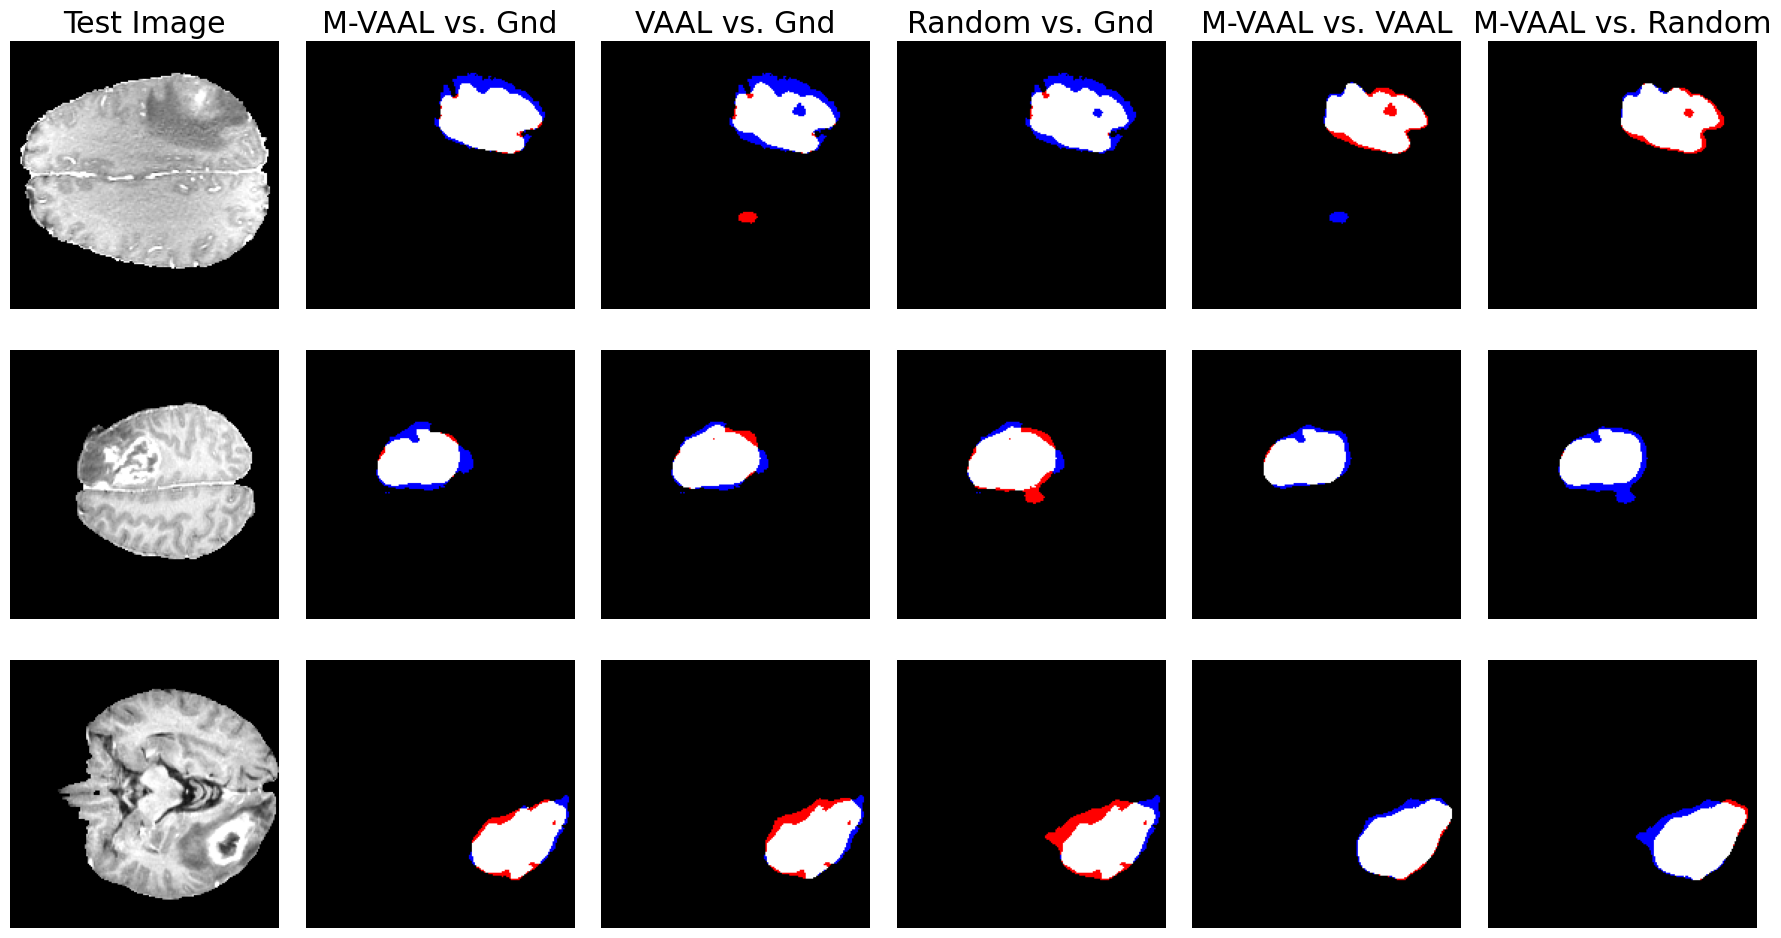

In [23]:
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageChops


def loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
    
def and_diff_mask(image1, image2):

    image1_and_image2 = ImageChops.logical_and(image1,image2).convert('L')
    image1_diff_image2 = ImageChops.difference(image1, image1_and_image2).convert('L')
    image2_diff_image1 = ImageChops.difference(image2, image1_and_image2).convert('L')

    # Create color images from the binary images
    color1 = Image.new('RGB', image1_and_image2.size, (255, 255, 255))
    color2 = Image.new('RGB', image1_and_image2.size, (255, 0, 0))
    color3 = Image.new('RGB', image1_and_image2.size, (0, 0, 255))

    # Merge the color images with the binary images
    merged_img = Image.merge('RGB', (image1_and_image2.point(lambda x: x*255), image1_diff_image2.point(lambda x: x*255), image2_diff_image1.point(lambda x: x*255)))
    merged_img = Image.composite(color1, merged_img, image1_and_image2)
    merged_img = Image.composite(color2, merged_img, image1_diff_image2)
    merged_img = Image.composite(color3, merged_img, image2_diff_image1)

    return merged_img


matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3,6, figsize = (18,10))

files = ['555.png','368.png','912.png']
file_index = []
for k, fil in enumerate(input_images):
    for f in files:
        if f in fil:
            file_index.append(k)

count = 0
for i in file_index:

    print (input_images[i],mvaal_images[i],ground_truths[i])
    input_img = loader(input_images[i]).crop((30,30,210,210))
    gnd_mask = loader(ground_truths[i]).convert('1').crop((30,30,210,210))
    mvaal_mask = loader(mvaal_images[i]).convert('1').crop((30,30,210,210))
    vaal_mask = loader(vaal_images[i]).convert('1').crop((30,30,210,210))
    random_mask = loader(random_images[i]).convert('1').crop((30,30,210,210))

    image1_and_image2 = ImageChops.logical_and(mvaal_mask,gnd_mask).convert('L')
    image1_diff_image2 = ImageChops.difference(gnd_mask, image1_and_image2).convert('L')
    image2_diff_image1 = ImageChops.difference(mvaal_mask, image1_and_image2).convert('L')


    gnd_comp = and_diff_mask(mvaal_mask,gnd_mask)
    vaal_comp = and_diff_mask(mvaal_mask,vaal_mask)
    rand_comp = and_diff_mask(mvaal_mask,random_mask)
    vaal_gnd_comp = and_diff_mask(vaal_mask,gnd_mask)
    rand_gnd_comp = and_diff_mask(random_mask,gnd_mask)


    if count < 1:
        ax[count,0].imshow(input_img)
        ax[count,0].set_title("Test Image")
        ax[count,0].set_axis_off()
        ax[count,1].imshow(gnd_comp)
        ax[count,1].set_axis_off()
        ax[count,1].set_title("M-VAAL vs. Gnd")
        ax[count,2].imshow(vaal_gnd_comp)
        ax[count,2].set_axis_off()
        ax[count,2].set_title("VAAL vs. Gnd")
        ax[count,3].imshow(rand_gnd_comp)
        ax[count,3].set_axis_off()
        ax[count,3].set_title("Random vs. Gnd")
        ax[count,4].imshow(vaal_comp)
        ax[count,4].set_axis_off()
        ax[count,4].set_title("M-VAAL vs. VAAL")
        ax[count,5].imshow(rand_comp)
        ax[count,5].set_axis_off()
        ax[count,5].set_title("M-VAAL vs. Random")

    else:
        ax[count,0].imshow(input_img)
        ax[count,0].set_axis_off()
        ax[count,1].imshow(gnd_comp)
        ax[count,1].set_axis_off()
        ax[count,2].imshow(vaal_gnd_comp)
        ax[count,2].set_axis_off()
        ax[count,3].imshow(rand_gnd_comp)
        ax[count,3].set_axis_off()
        ax[count,4].imshow(vaal_comp)
        ax[count,4].set_axis_off()
        ax[count,5].imshow(rand_comp)
        ax[count,5].set_axis_off()
    count +=1
plt.tight_layout() 